# Lesson3: final part

[Lesson 3](https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.ipynb) demonstrated how bluesky can show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.
**note**:  This tutorial expects to find an EPICS IOC on the local network configured as a synApps [`xxx`](https://github.com/epics-modules/xxx) IOC with prefix `sky:`.  A docker container is available to provide this IOC.  See this URL for instructions:  https://github.com/prjemian/epics-docker/blob/master/n3_synApps/README.md

In [1]:
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "sky:"     # use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
m1.wait_for_connection()
scaler.wait_for_connection()
scaler.select_channels(None)

Count the detector (5 times)



Transient Scan ID: 1     Time: 2020-05-07 15:02:30
Persistent Unique Scan ID: 'aa321e07-83fe-4d41-afd0-31725d2c7447'
New stream: 'primary'


<IPython.core.display.Javascript object>


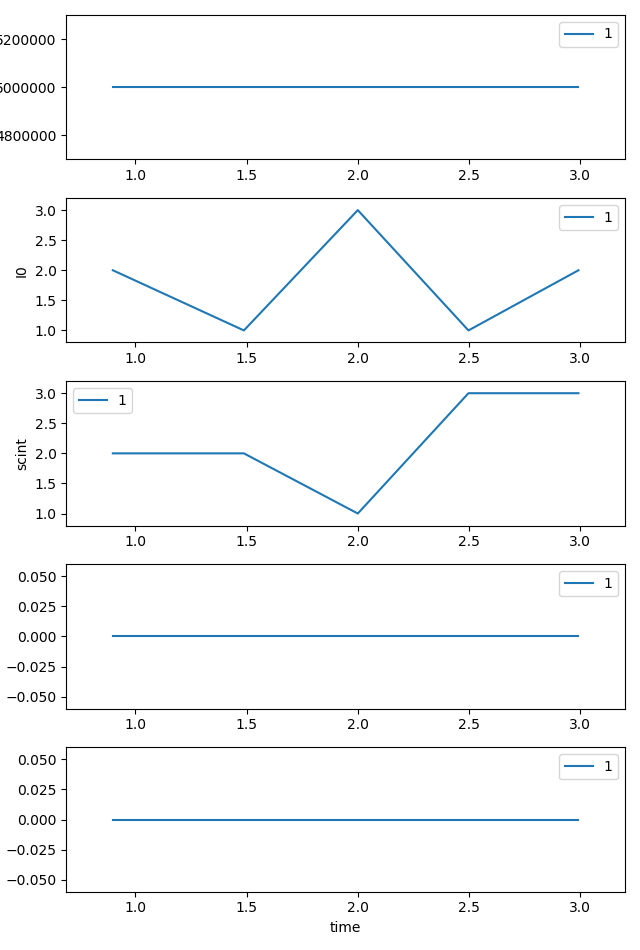

+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |       ROI1 |       ROI2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 15:02:31.6 |    5000000 |          2 |          2 |          0 |          0 |
|         2 | 15:02:32.2 |    5000000 |          1 |          2 |          0 |          0 |
|         3 | 15:02:32.7 |    5000000 |          3 |          1 |          0 |          0 |
|         4 | 15:02:33.2 |    5000000 |          1 |          3 |          0 |          0 |
|         5 | 15:02:33.7 |    5000000 |          2 |          3 |          0 |          0 |
+-----------+------------+------------+------------+------------+------------+------------+
generator count ['aa321e07'] (scan num: 1)





('aa321e07-83fe-4d41-afd0-31725d2c7447',)

In [3]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.



Transient Scan ID: 2     Time: 2020-05-07 15:02:40
Persistent Unique Scan ID: 'cb362cd3-505a-40a1-afcc-f180ae00ea68'
New stream: 'primary'


<IPython.core.display.Javascript object>


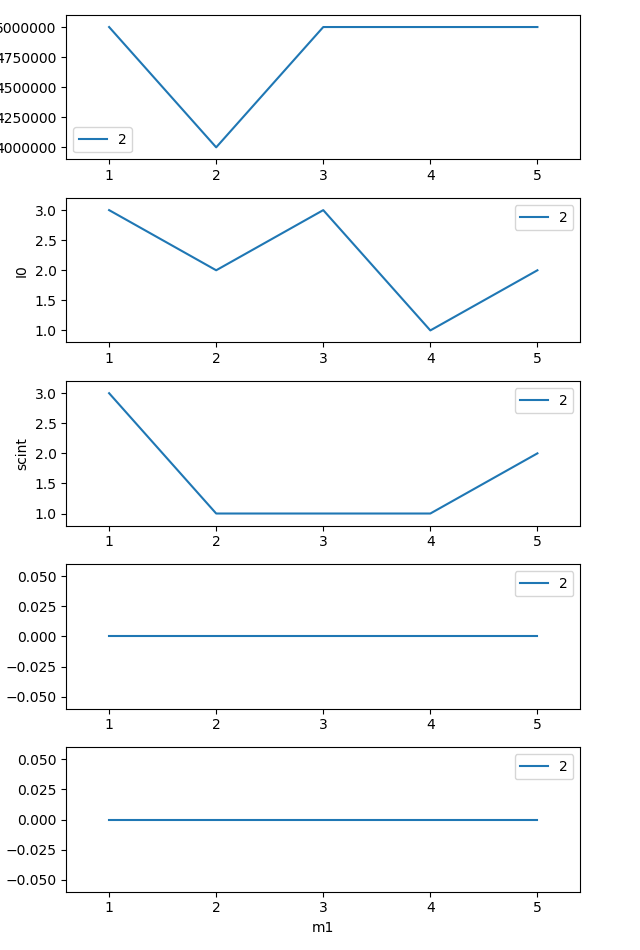

+-----------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |       ROI1 |       ROI2 |
+-----------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 15:02:45.8 |    1.00000 |    5000000 |          3 |          3 |          0 |          0 |
|         2 | 15:02:47.7 |    2.00000 |    4000000 |          2 |          1 |          0 |          0 |
|         3 | 15:02:49.6 |    3.00000 |    5000000 |          3 |          1 |          0 |          0 |
|         4 | 15:02:51.5 |    4.00000 |    5000000 |          1 |          1 |          0 |          0 |
|         5 | 15:02:53.4 |    5.00000 |    5000000 |          2 |          2 |          0 |          0 |
+-----------+------------+------------+------------+------------+------------+------------+------------+
generator scan ['cb362cd3'] (scan num: 2)





/home/beams/JEMIAN/.conda/envs/bluesky_2020_5/lib/python3.7/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


('cb362cd3-505a-40a1-afcc-f180ae00ea68',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5))